In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.svm import SVC

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def Decision_Boundary(X , y , C , gamma ) :
  '''
  Vẽ đường ranh giới của thuật toán SVM giữa các điểm dữ liệu thuộc các lớp khác nhau 
  Tham số :
  X -- Dữ liệu cần huấn luyện
  y -- Label của tập huấn luyện
  C -- Tham số C trong thuật toán SVM  
  gamma -- Tham số gamma trong thuật toán SVM
  '''
  model = svm.SVC(kernel='rbf', C = C, gamma =  gamma)
  fig, ax = plt.subplots()
  title = ('Decision Boundary of SVM with C = ' + str(C) + ' gamma = ' + str(gamma))
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
  ax.set_title(title)
  plt.show()

In [3]:
#Tải File
!wget https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_3.txt #tải file data_3
!wget https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_4.txt #tải file data_4

--2021-07-08 13:42:43--  https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_3.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345 [text/plain]
Saving to: ‘data_3.txt.4’

data_3.txt.4        100%[===================>]     345  --.-KB/s    in 0s      

2021-07-08 13:42:43 (24.4 MB/s) - ‘data_3.txt.4’ saved [345/345]

--2021-07-08 13:42:43--  https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_4.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399 [text/plain]
Saving to: ‘data_4.txt.4’

data_

In [4]:
data3 = np.loadtxt("data_3.txt")
data4 = np.loadtxt("data_4.txt")

X3 = data3[:,0:2]
y3 = data3[:,2]

X4 = data4[:,0:2]
y4 = data4[:,2]


###  1. Thử chạy SVM trên 2 files data_3.txt và data_4.txt với C=[0.1, 1.0, 10.0, 100.0]

#### data_3

Score ứng với C bằng 0.1 là 0.312


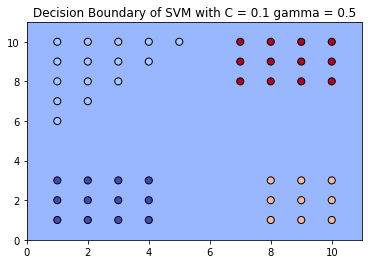

Score ứng với C bằng 1 là 1.000


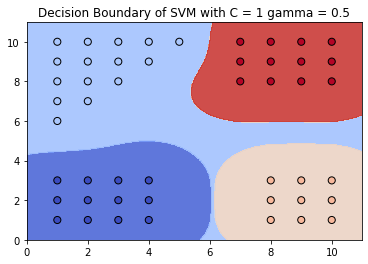

Score ứng với C bằng 10 là 1.000


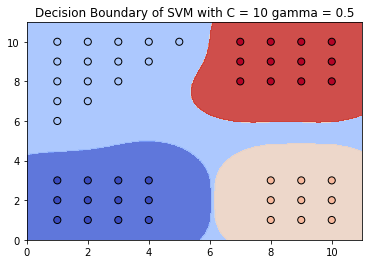

Score ứng với C bằng 100 là 1.000


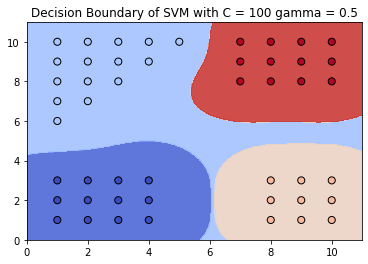

In [5]:
list_y_pred = []
list_C = [0.1, 1, 10, 100]
for i in range(len(list_C)):
  clf = svm.SVC(C = list_C[i], kernel="rbf",gamma= 0.5)
  clf.fit(X3,y3)
  print('Score ứng với C bằng {} là {:.3f}'.format(list_C[i] , clf.score(X3,y3)))
  Decision_Boundary(X3 , y3 , list_C[i] , 0.5  )

#### data_4

Score ứng với C bằng 0.1 là 0.733


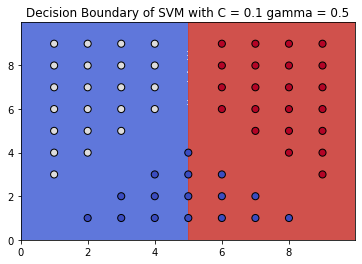

Score ứng với C bằng 1 là 1.000


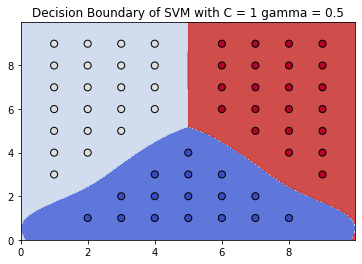

Score ứng với C bằng 10 là 1.000


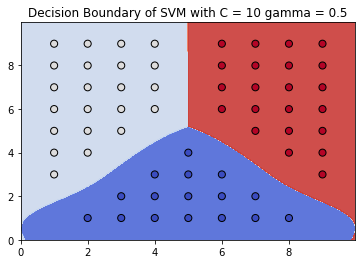

Score ứng với C bằng 100 là 1.000


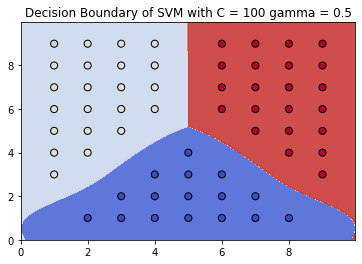

In [6]:
list_y_pred = []
list_C = [0.1, 1, 10, 100]
for i in range(len(list_C)):
  clf = svm.SVC(C = list_C[i], kernel="rbf",gamma= 0.5)
  clf.fit(X4,y4)
  print('Score ứng với C bằng {} là {:.3f}'.format(list_C[i] , clf.score(X4,y4)))
  Decision_Boundary(X4 , y4 , list_C[i] , 0.5  )

### 2. Nhận xét với từng $C$ khác nhau thì mô hình thay đổi như thế nào





Tham số **C** của thuật toán SVM nói về số lượng điểm trong tập huấn luyện mà bạn không muốn phân lớp sai.
 Đối với **C** lớn, nghĩa là thuật toán quan tâm tới **per-sample error** nghĩa là tham số này không cho các điểm dữ liệu nằm lộn class.
 Đối với **C** nhỏ , thì thuật toán sẽ cho phép các data point nằm lẫn vào các class khác và đồng thời đạt mục tiêu tăng margin lớn nhất có thể.



 Nhìn vào các hình ở dữ liệu data_3, ta thấy rằng đối với :
 **C = 0.1** thì ta thấy rằng không có đường ranh giới nào giữa các lớp khiến cho score của mô hình này có giá trị khá thấp. 
 **C = 1,10,100** thì ta thấy rằng đã có đường ranh giới rõ ràng giữa các lớp khác nhau và làm cho score của mô hình này rất cao.
 
Trường hợp tương tự cũng xảy ra với data_4.

### 3. Nêu lợi và hại khi tăng $gamma$ và giảm $gamma$
 

Score ứng với gamma bằng 0.001 là 0.783


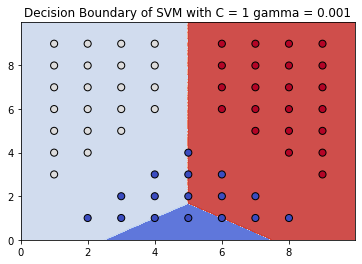

Score ứng với gamma bằng 0.01 là 1.000


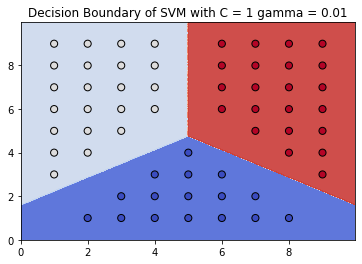

Score ứng với gamma bằng 0.1 là 1.000


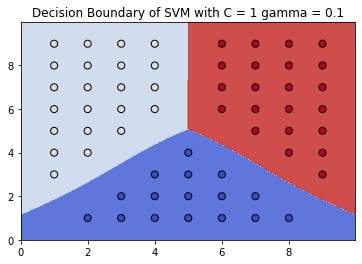

Score ứng với gamma bằng 1 là 1.000


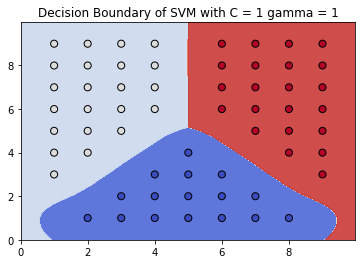

Score ứng với gamma bằng 10 là 1.000


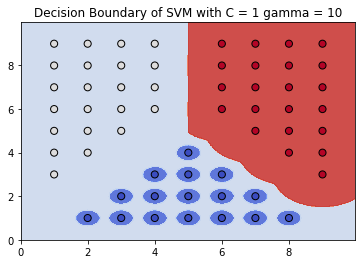

Score ứng với gamma bằng 100 là 1.000


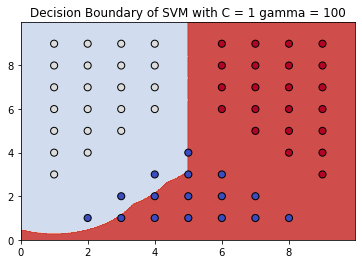

In [7]:
list_y_pred = []
list_gamma = [0.001, 0.01, 0.1, 1, 10, 100]
for i in range(len(list_gamma)):
  clf = svm.SVC(C = 1, kernel="rbf",gamma= list_gamma[i])
  clf.fit(X4,y4)
  print('Score ứng với gamma bằng {} là {:.3f}'.format(list_gamma[i], clf.score(X4,y4)))
  Decision_Boundary(X4 , y4 , 1 , list_gamma[i] )

The RBF Gamma parameter influences the distance of impact of a single training point. Low gamma values mean a broad similarity radius which results in more points being clustered together. In the case of high gamma values, points must be very close to each other in order to be included in the same category (or class). Models with very high gamma values appear to be over-fitting, thus.

Tham số **Gamma** gấn giống với phương sai của phân phối Gauss. 

$$K_{Gauss}(\boldsymbol{x_j,x_j}) = e^{-\dfrac{\gamma \left \|\boldsymbol{x_j - x_i}  \right \|^2 }{2\sigma^2} }$$

**Gamma lớn** nói lên rằng phân phối Gauss có phương sai rất nhỏ (dễ bị **underfitting**) . Còn nếu **Gamma nhỏ** thì phân phối Gauss sẽ có phương sai lớn dễ bị **overfitting**.